In [453]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [25]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [7]:
#df.head()

In [8]:
df.shape

(13320, 9)

### Data Cleaning

In [26]:
df.groupby("area_type")["area_type"].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [27]:
df1 = df.drop(["area_type","availability","society","balcony"], axis = 1)

In [12]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [13]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [28]:
# The number of data is 13000, and there is only 73 are null, so we have to remove these value, if we could not remove the fill it by its medians
df2 = df1.dropna()

In [29]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [16]:
# This function will show those value which is unique in dataframe
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [31]:
# There is two main value Bedroom, BHK, these both are same value
# So we took the first value and remove the character
# The below function will split the value and took the first value
# The output value is string, the int fuction convert it into integer
df2["Bedroom"] = df2["size"].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Mohsin\AppData\Local\Temp\ipykernel_6228\272497719.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Bedroom"] = df2["size"].apply(lambda x: int(x.split(' ')[0]))


In [32]:
df2.head(2)

,location,size,total_sqft,bath,price,Bedroom
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4


In [33]:
df2.Bedroom.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [34]:
df2[df2["Bedroom"] > 20]

,location,size,total_sqft,bath,price,Bedroom
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


<AxesSubplot:xlabel='Bedroom', ylabel='count'>

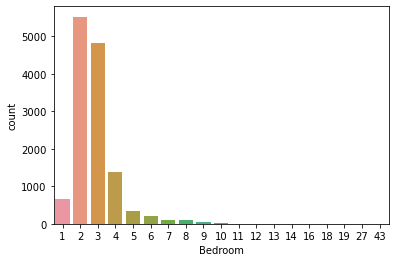

In [35]:
sb.countplot(data = df2, x = df2.Bedroom)

In [39]:
df2["Bedroom"].value_counts()

2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: Bedroom, dtype: int64

In [52]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [54]:
# This fuction will covert all value into float which are valid
# Those value which is not valid it will return False
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [56]:
# This sign "~" will show the revese value of the function
df2[~df2.total_sqft.apply(is_float)].head()

,location,size,total_sqft,bath,price,Bedroom
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [58]:
df2[df2.total_sqft.apply(is_float)].head(2)

,location,size,total_sqft,bath,price,Bedroom
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4


In [64]:
# Now convert the non valid value into valid value, by taking its mean value

def convert_into_float(x):
    numb = x.split('-')
    if len(numb) == 2:
        return (float(numb[0])+float(numb[1]))/2
    try:
        return float(x)
    except:
        return None

In [68]:
convert_into_float("2316.0")

2316.0

In [69]:
convert_into_float("2316.0 Meter" )

In [70]:
convert_into_float("2316.0 - 4320")

3318.0

In [71]:
df3 = df2.copy()
df3["total_sqft"] = df3["total_sqft"].apply(convert_into_float)

In [73]:
df3.head(2)

,location,size,total_sqft,bath,price,Bedroom
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [74]:
df3.loc[122]

location      Hebbal
size           4 BHK
total_sqft    5611.5
bath             4.0
price          477.0
Bedroom            4
Name: 122, dtype: object

In [76]:
(3067+8156)/2

5611.5

### Feature Engineering

In [77]:
df3.head(2)

,location,size,total_sqft,bath,price,Bedroom
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [115]:
df4 = df3.copy()

In [116]:
# Now convert price into price per square feet
df4["Price_per_sqrt"] = df4['price'] * 100000/df4['total_sqft']

In [81]:
df4.head()

,location,size,total_sqft,bath,price,Bedroom,Price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


#### Location
Minimize the Location which is less than 10

In [117]:
len(df4.location.unique())

1304

In [120]:
# This function will remove extra space from the end of the location
df4.location = df4.location.apply(lambda x: x.strip())

In [121]:
len(df4.location.unique())

1293

In [122]:
location_counter = df4.groupby("location")["location"].agg('count').sort_values(ascending = False)
location_counter

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [123]:
location_counter_less_than_10 = location_counter[location_counter <= 10]

In [124]:
len(location_counter_less_than_10)

1052

In [125]:
len(df4.location.unique())

1293

In [127]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_counter_less_than_10 else x)

In [128]:
len(df4.location.unique())

242

In [130]:
df4.head(10)

,location,size,total_sqft,bath,price,Bedroom,Price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


### Outlier Removing

In [131]:
df4.describe()

,total_sqft,bath,price,Bedroom,Price_per_sqrt
count,13200.000000,13246.000000,13246.000000,13246.000000,1.320000e+04
mean,1555.302783,2.692586,112.389392,2.801902,7.920759e+03
std,1237.323445,1.341506,149.076587,1.295758,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [243]:
df5 = df4.copy()

#### Remove those data in which total sqr divivd by Bedroom is less than 300, Because there is no Bedroom made in such area

In [244]:
df5[df5.total_sqft/df5.Bedroom < 300].value_counts().sum()

744

In [245]:
df5.shape

(13246, 7)

In [246]:
df5 = df5[~(df5.total_sqft/df5.Bedroom < 300)]
df5.shape

(12502, 7)

In [141]:
13246-12502

744

### Visualization

<AxesSubplot:>

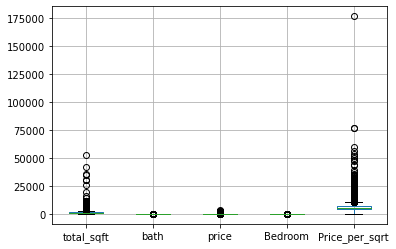

In [247]:
df5.boxplot()

<AxesSubplot:xlabel='Price_per_sqrt'>

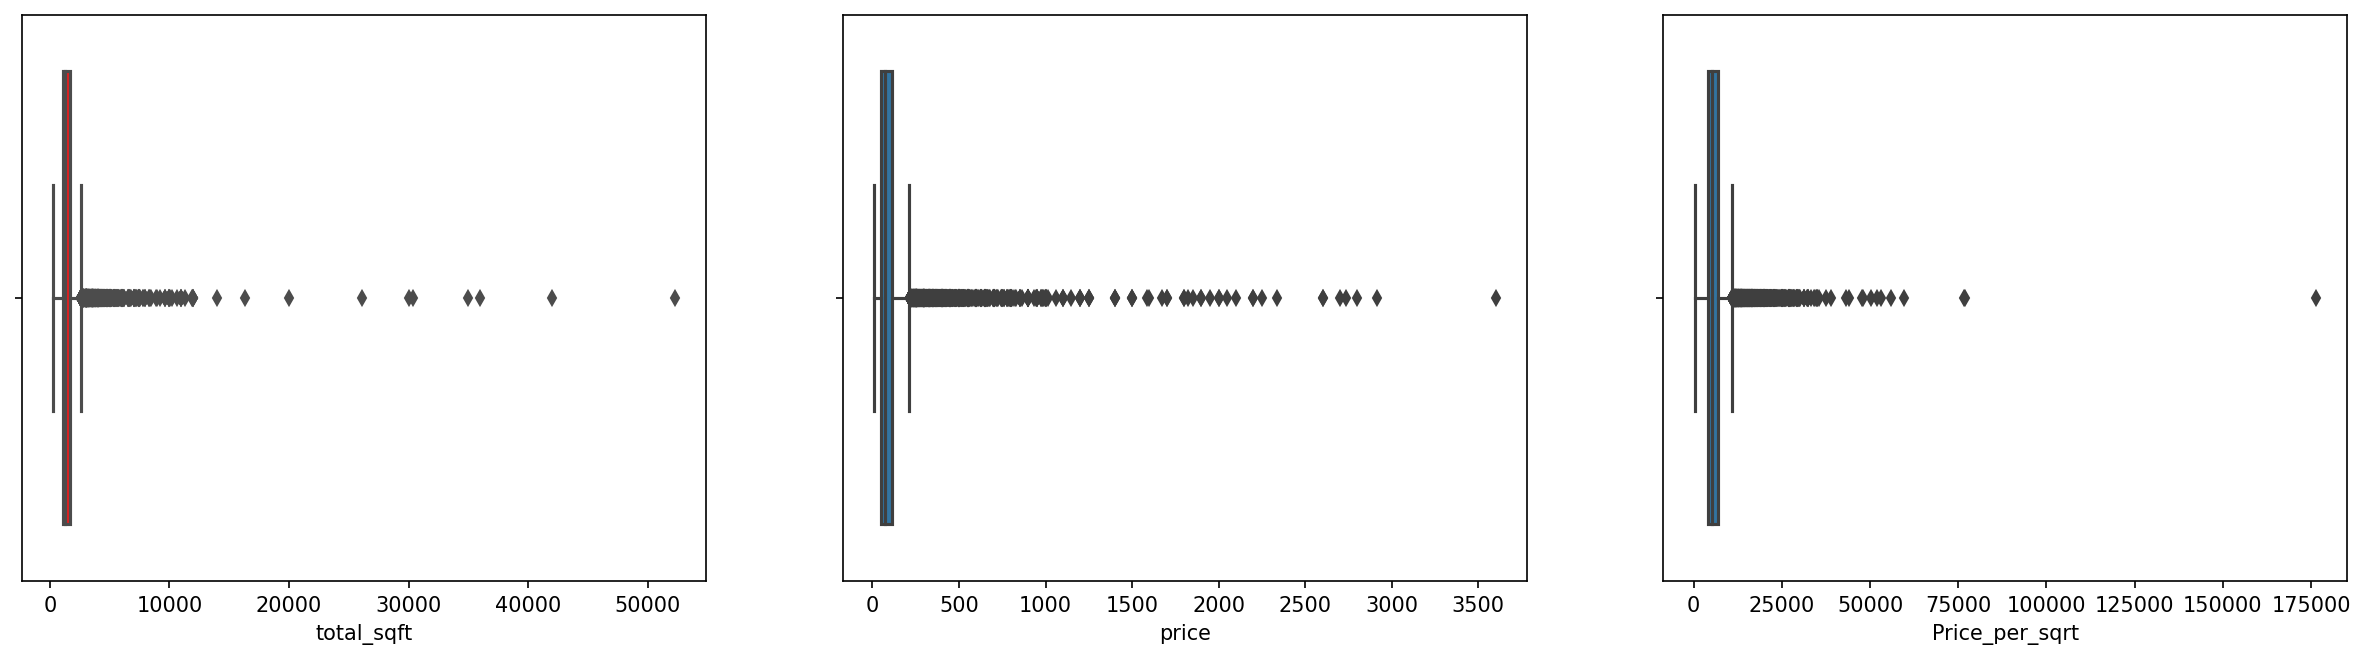

In [248]:
fig, axes = plt.subplots(1,3, figsize = (20,5), dpi = 150)

sb.boxplot(ax = axes[0], x = df5.total_sqft, color = "red")
sb.boxplot(ax = axes[1], x = df5.price)
sb.boxplot(ax = axes[2], x = df5.Price_per_sqrt)

Text(0.5, 1.0, 'Price_per_sqrt')

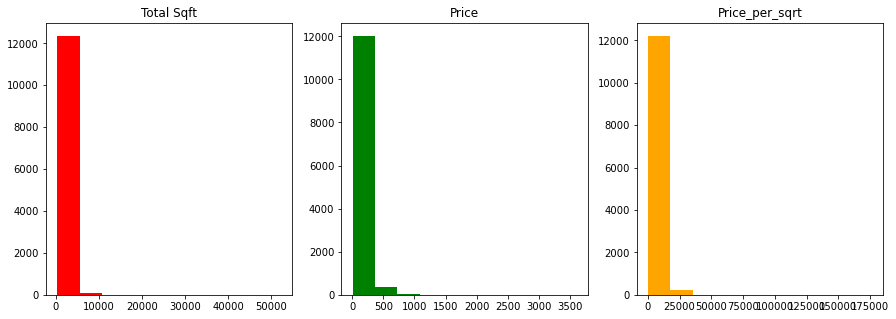

In [157]:
fig, (x1,x2, x3) = plt.subplots(1, 3, figsize = (15,5))

x1.hist(df5.total_sqft, color = "red")
x1.set_title("Total Sqft")

x2.hist(df5.price, color = "green")
x2.set_title("Price")

x3.hist(df5.Price_per_sqrt, color = "orange")
x3.set_title("Price_per_sqrt")


## IQR (Interquartile ranges or IQR?)
The IQR describes the middle 50% of values when ordered from lowest to highest.

The IQR is then the difference between Third quartile and First quartile.

                      IQR = Q3-Q1
General equation to calculate Interquartile range
Or in other words the bulk of values. To determine IQR we need to get Third quartile and first quartile.

### What is Quartiles?
Likewise percentile, a quartile instead cuts the data in 4 equal parts. Hence, 25th percentile is our first quartile, 50th percentile is second quartile, 75th percentile is our third quartile.

In [544]:
df6 = df5.copy()

### Function of IQR

In [536]:
df6 = df5.copy()

In [537]:
# Now to removing outlier through IQR function
def determine_outlier_thresholds_iqr(dataframe,col_name):
    quartile1 = dataframe[col_name].quantile(0.25)
    quartile3 = dataframe[col_name].quantile(0.75)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * iqr
    lower_limit = quartile1 - 1.5 * iqr
    new_df = dataframe[(dataframe[col_name] > lower_limit) & (dataframe[col_name] < upper_limit)]
    return new_df


In [538]:
df6.head(2)

,location,size,total_sqft,bath,price,Bedroom,Price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615


In [539]:
df6.shape

(12502, 7)

In [540]:
df6 = determine_outlier_thresholds_iqr(df6,"Price_per_sqrt")

In [541]:
df6.shape

(11453, 7)

C:\Users\Mohsin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price_per_sqrt'>

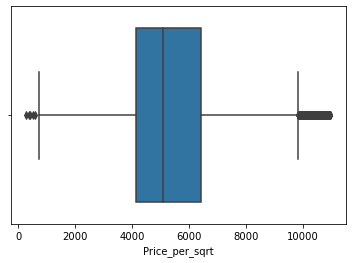

In [542]:
sb.boxplot(df6.Price_per_sqrt)

In [543]:
df6.head()

,location,size,total_sqft,bath,price,Bedroom,Price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


#### Total Square feet

In [545]:
# Find IQR for Total Square feet
# 25% Percentile
FQ_of_TotSqrft= df6.total_sqft.quantile(0.25)
# 75% Percentile
TQ_of_TotSqrft = df6.total_sqft.quantile(0.75)

In [546]:
# Finding IQR
Sqrft_IQR = TQ_of_TotSqrft-FQ_of_TotSqrft
Sqrft_IQR

585.0

In [547]:
# Find Upper and Lower Limits
UL_of_TotSqrft = TQ_of_TotSqrft + 1.5 * Sqrft_IQR
LL_of_TotSqrft = FQ_of_TotSqrft - 1.5 * Sqrft_IQR

In [548]:
# Count the number of row that will be remove from the Dataset.
df6[(df6.total_sqft < LL_of_TotSqrft) | (df6.total_sqft > UL_of_TotSqrft)].value_counts().sum()

1119

In [550]:
# Update dataset by romoving the Outlier rows from Dataset
df6 = df6[(df6.total_sqft > LL_of_TotSqrft) & (df6.total_sqft < UL_of_TotSqrft)]

C:\Users\Mohsin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_sqft'>

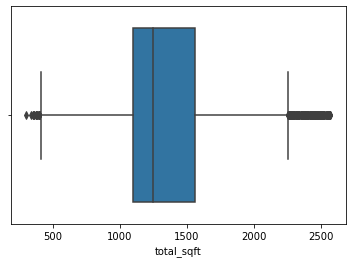

In [551]:
sb.boxplot(df6.total_sqft)

<AxesSubplot:>

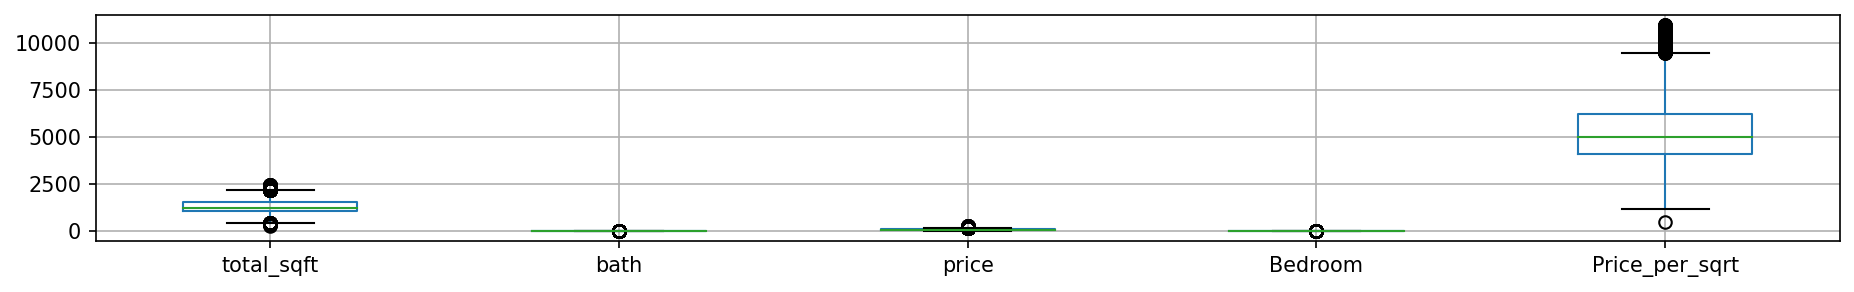

In [513]:
plt.figure(figsize = (15,2), dpi = 150)
df6.boxplot()

#### Price Per Square feet

In [555]:
# Find IQR for price per square feet
# First Quantile (25% Percentile)
FQ_of_PPSFT = df6.Price_per_sqrt.quantile(0.25)
# Third Quantile (75% Percentile)
TQ_of_PPSFT = df6.Price_per_sqrt.quantile(0.75)

In [556]:
# IQR of Price Per Square feet
PPSFT_IQR = TQ_of_PPSFT-FQ_of_PPSFT

In [557]:
#Upper Limit and Lower Limit of Price per Square feet
UL_PPSFT = TQ_of_PPSFT + 1.5 * PPSFT_IQR
LL_PPSFT = FQ_of_PPSFT - 1.5 * PPSFT_IQR

In [558]:
# Count number of row that will be remove from the Dataset.
df6[(df6.Price_per_sqrt < LL_PPSFT) | (df6.Price_per_sqrt > UL_PPSFT)].value_counts().sum()

288

In [559]:
# Update dataset by romoving the Outlier rows from Dataset
df6 = df6[(df6.Price_per_sqrt > LL_PPSFT) & (df6.Price_per_sqrt < UL_PPSFT)]

<AxesSubplot:>

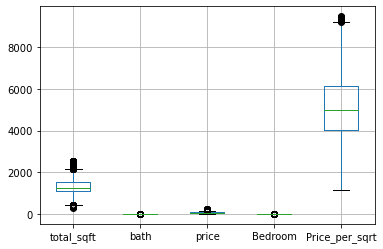

In [560]:
df6.boxplot()

#### Price

In [561]:
# Find IQR for Price
# First Quantile (25% Percentile)
FQ_of_Price = df6.price.quantile(0.25)
# Third Quantile (75% Percentile)
TQ_of_Price = df6.price.quantile(0.75)

In [562]:
Price_IQR = TQ_of_Price - FQ_of_Price

In [563]:
UL_of_Price = TQ_of_Price + 1.5 * Price_IQR
LL_Of_price = FQ_of_Price - 1.5 * Price_IQR

In [564]:
df6[(df6.price < LL_Of_price) | (df6.price > UL_of_Price)].value_counts().sum()

436

In [565]:
df6 = df6[(df6.price > LL_Of_price) & (df6.price < UL_of_Price)]

<AxesSubplot:xlabel='Bedroom'>

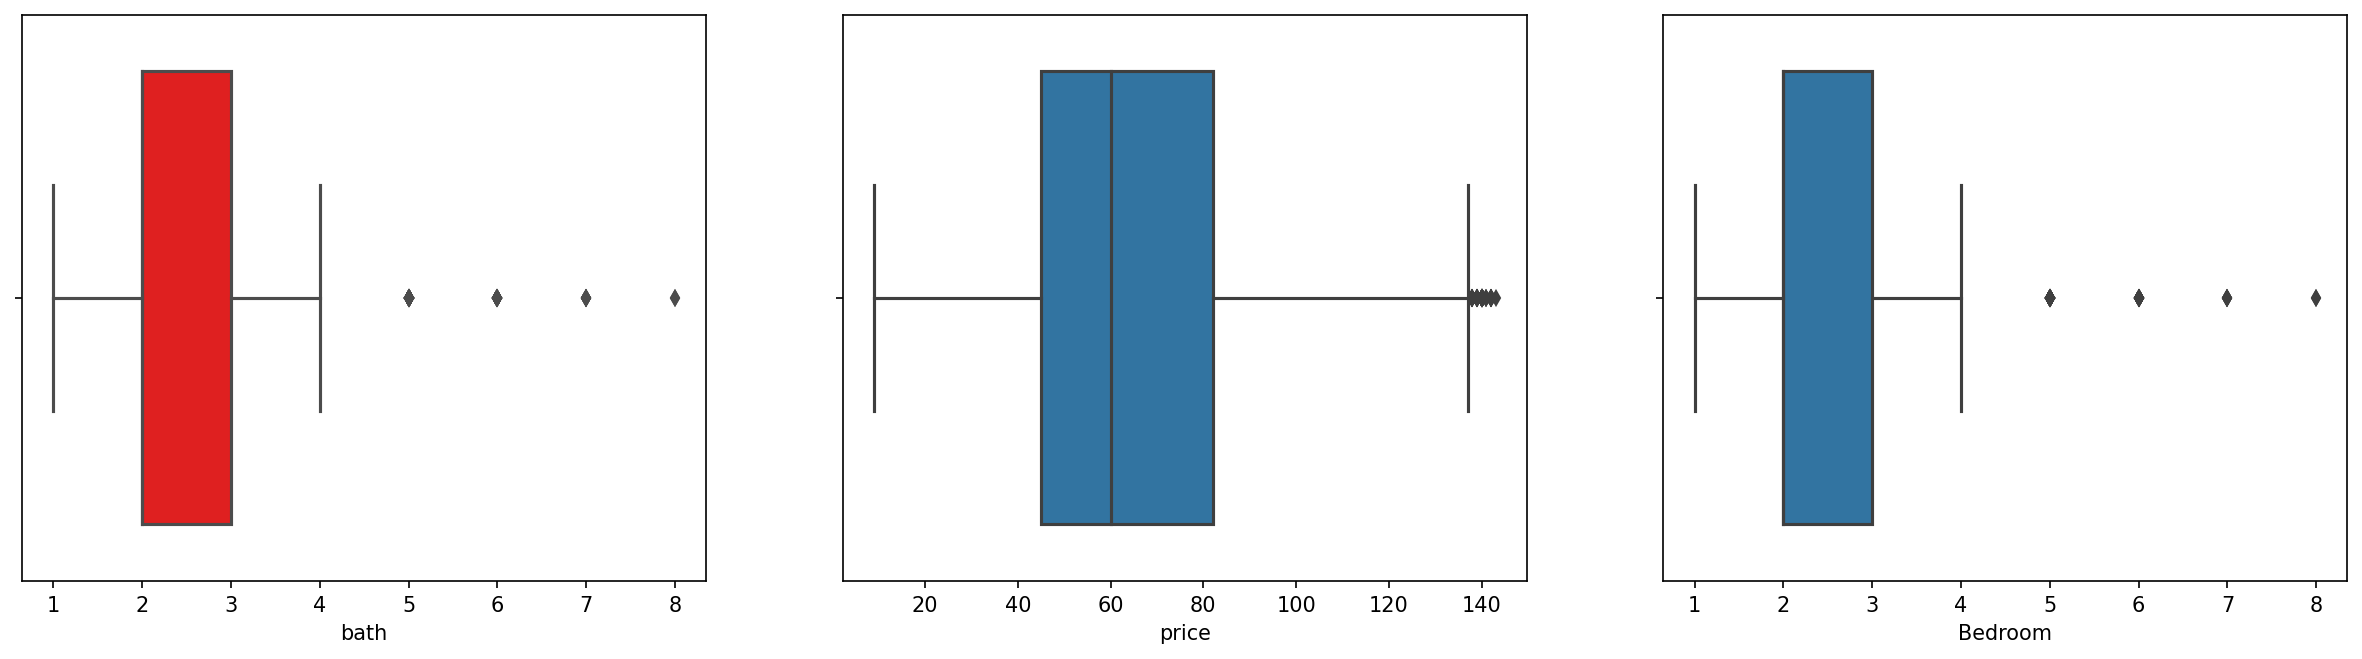

In [566]:
fig, axes = plt.subplots(1,3, figsize = (20,5), dpi = 150)

sb.boxplot(ax = axes[0], x = df6.bath, color = "red")
sb.boxplot(ax = axes[1], x = df6.price)
sb.boxplot(ax = axes[2], x = df6.Bedroom)

In [524]:
df6.head()

,location,size,total_sqft,bath,price,Bedroom,Price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248


### Visualize the total square feet area with price per square feet

In [359]:
df7 = df6.copy()

In [360]:
def plot_scatter_chart(dff,location):
    Bedroom2 = dff[(dff.location == location) & (dff.Bedroom == 2)]
    Bedroom3 = dff[(dff.location == location) & (dff.Bedroom == 3)]
    plt.figure(figsize = (15,10))
    sb.scatterplot(Bedroom2.total_sqft, Bedroom2.price, color = 'orange', label = "2 Bedroom", s = 50)
    sb.scatterplot(Bedroom3.total_sqft, Bedroom3.price, color = 'red', label = "3 Bedroom", s = 50)
    plt.xlabel("Total Square feet")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

C:\Users\Mohsin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mohsin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


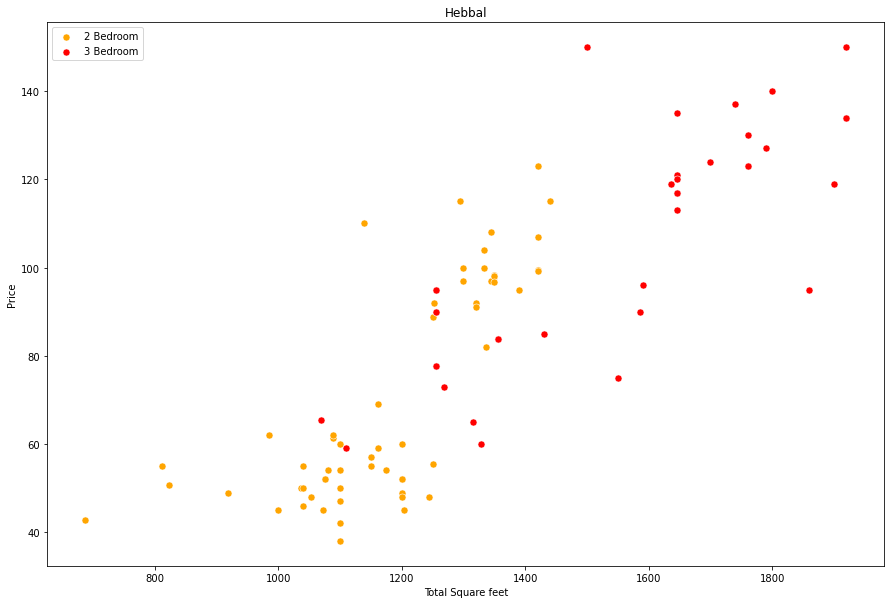

In [361]:
plot_scatter_chart(df6,"Hebbal")

 we should remove properties where for same location, the price of(for example) 3 Bedroom apartment is less than 2 Bedroom apartment (with same square ft area). what we will do is for a give location, we will build a dictionary of stats Bedroom i_e.      
{     
    '1':{                               
        'mean' : 4000,   
        'std' : 2000,    
        'count' : 34  
    },                    
    '2': {                       
        'mean' : 4300,   
        'std' : 2300,             
        'count' : 22   
    },   
}       
   
now we have remove those 2 Bedroom apartment whose price_per_sqrft is less than mean price_per_sqrt of 1 Bedroom apartment. 

In [362]:
def remove_Bedroom_Outlier(dfb):
    exclude_indices = np.array([])
    for location, location_df in dfb.groupby('location'):
        Bedroom_stats = {}
        for Bedroom, Bedroom_df in location_df.groupby('Bedroom'):
            Bedroom_stats[Bedroom] = {
                'mean' : np.mean(Bedroom_df.Price_per_sqrt),
                'std' : np.std(Bedroom_df.Price_per_sqrt),
                'count' : Bedroom_df.shape[0]
            }
        for Bedroom, Bedroom_df in location_df.groupby("Bedroom"):
            stats = Bedroom_stats.get(Bedroom-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, Bedroom_df[Bedroom_df.Price_per_sqrt < (stats['mean'])].index.values)
        
    return dfb.drop(exclude_indices, axis = 'index')

In [363]:
df8 = remove_Bedroom_Outlier(df7)

C:\Users\Mohsin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mohsin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


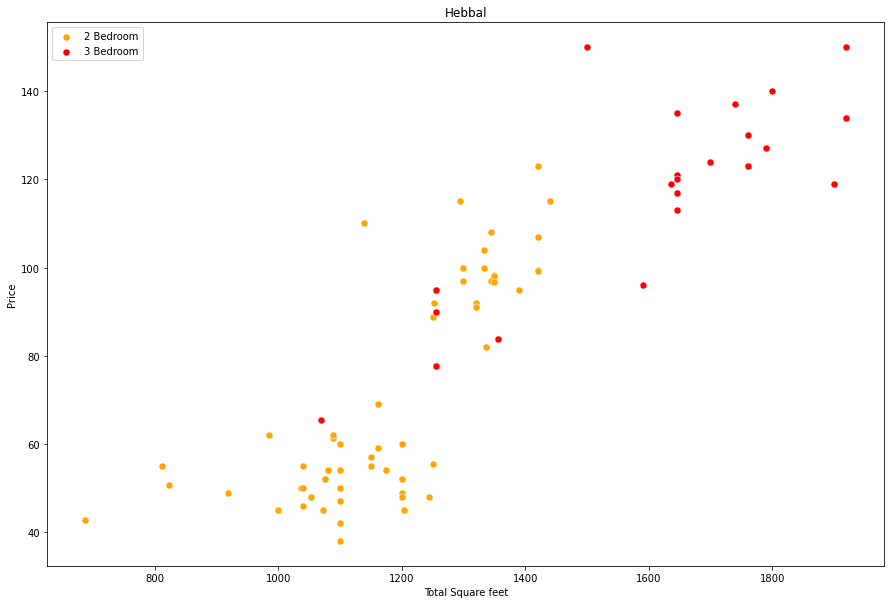

In [364]:
plot_scatter_chart(df8,"Hebbal")

In [365]:
df6.shape

(10127, 7)

In [366]:
df8.shape

(7190, 7)

<AxesSubplot:xlabel='Price_per_sqrt', ylabel='Count'>

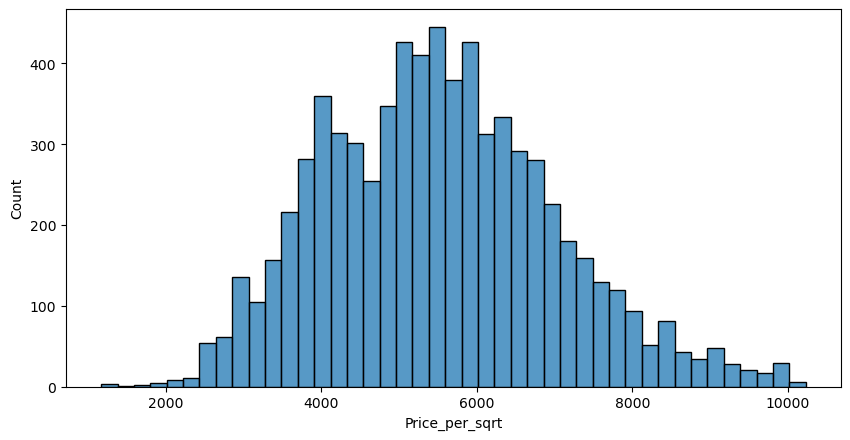

In [367]:
plt.figure(figsize = (10,5), dpi = 100)
sb.histplot(df8.Price_per_sqrt)

In [368]:
df8.bath.unique()

array([2., 3., 1., 5., 4., 6., 7., 8.])

In [369]:
df8[df8.bath > df8.Bedroom + 2]

,location,size,total_sqft,bath,price,Bedroom,Price_per_sqrt
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.03252
12103,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.03433


In [370]:
df9 = df8[df8.bath < df8.Bedroom + 2]

In [371]:
df8.shape

(7190, 7)

In [373]:
df9.shape

(7179, 7)

In [374]:
df10 = df9.drop(['size', 'Price_per_sqrt'], axis = 1)

In [375]:
df10.head(2)

,location,total_sqft,bath,price,Bedroom
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3


### Convert String to Numeric
we have one columns which is string, we have to convert it into number to train the model.

In [377]:
dummies_df = pd.get_dummies(df10.location)
dummies_df.head(2)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [378]:
# for concation we have to remove the last columns
df11 = pd.concat([df10,dummies_df.drop(['other'], axis = 'columns')], axis = 'columns')
df11.head()

,location,total_sqft,bath,price,Bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,62.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,51.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,7th Phase JP Nagar,1000.0,2.0,38.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [380]:
df12 = df11.drop('location', axis = 1)
df12.head(2)

,total_sqft,bath,price,Bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Machine Learning Model 

In [472]:
x = df12.drop('price', axis = 1)
x.head()

,total_sqft,bath,Bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1000.0,2.0,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [473]:
y = df12.price
y.head()

0     39.07
2     62.00
3     95.00
4     51.00
12    38.00
Name: price, dtype: float64

In [474]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 10)

### Linear Regression

In [388]:
from sklearn.linear_model import LinearRegressionnearRegression

In [393]:
LR = LinearRegression()
LR.fit(xtrain,ytrain)
LR.score(xtest,ytest)

0.7753206389405287

### Cross Validation

In [408]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
LR_Score = cross_val_score(LR,x,y,cv = cv)

In [404]:
np.average(LR_Score)

0.7821424920345701

### Lasso and Decision Tree

In [405]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

Lasso = Lasso()
DTR = DecisionTreeRegressor()

In [410]:
DTR_Score = cross_val_score(DTR,x,y,cv = cv)
np.average(DTR_Score)

0.674755727689328

In [412]:
Lasso_Score = cross_val_score(Lasso,x,y,cv = cv)
np.average(Lasso_Score)

0.6753037524473392

### SVM and RandomForestRegressor

In [414]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor

svm = SVC()
RFR = RandomForestRegressor()

In [418]:
#svm_Score = cross_val_score(svm,x,y,cv = cv)
#np.average(DTR_Score)

In [415]:
RFR_Score = cross_val_score(RFR,x,y,cv = cv)
np.average(RFR_Score)

0.7612741905246899

### Predict Price

In [475]:
x.columns

Index(['total_sqft', 'bath', 'Bedroom', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=242)

In [482]:
def predict_price(location,sqft,bath,Bedroom):
    # it will detect the location columns number.
    # The double zer- [0][0] will show, index number of that location.
    loc_index = np.where(x.columns == location)[0][0]
    
    # It will create the array of size x, with all value is zero
    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = Bedroom
    if loc_index >= 0:
        X[loc_index] = 1
    
    # [0] it will convert array into number
    return LR.predict([X])[0]

In [483]:
predict_price("1st Phase JP Nagar",1000,3,3)

C:\Users\Mohsin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


75.63576967551424

In [484]:
predict_price("Yelenahalli",1000,2,2)

C:\Users\Mohsin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


36.33034317404956

In [447]:
predict_price("Indira Nagar",1000,3,3)

C:\Users\Mohsin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.0961259045576